In [1]:
# Import the required module
import os  
import pandas as pd  
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Create folder for .png files, if it does not exist
Plot_Path = 'PNGFiles'
if not os.path.exists(Plot_Path):
       os.makedirs(Plot_Path)

# Read Excel Files, skipthe first 3 rows for Contact, Exposure and Proximity files. 
contact_file = pd.read_excel('Contact_With_Others.xls',skiprows = [0,1,2])
exposure_file = pd.read_excel('Exposure_to_Disease_and_Infection.xls',skiprows = [0,1,2])
p_proximity_file = pd.read_excel('Physical_Proximity.xls',skiprows = [0,1,2])
occupation_file = pd.read_excel('Occupation Salary Population and  Type.xlsx')


In [3]:
# Rename 'Occupation' field to 'OCCUPATION' for joining with Occupation file. 
contact_file = contact_file.rename(columns={'Occupation': 'OCCUPATION'})

# Join Contact, Exposure and Proximity data using Code column, 
# let us call resulting dataset as 'OverallRiskScore'
OverallRiskScore_raw = contact_file.merge(
    exposure_file[['E_D_I Context', 'Code']], on = 'Code').merge(
    p_proximity_file[['P_P Context', 'Code']], on = 'Code')

# Add a new calculated column 'Overall Risk Score' with value = average of context field in all three files. 
OverallRiskScore_raw['Overall Risk Score'] = round((
    OverallRiskScore_raw['C_W_ O Context'] + OverallRiskScore_raw['E_D_I Context'] + OverallRiskScore_raw['P_P Context'])/3, 2)

# Re-order the column sequence for OverallRiskScore_raw dataset 
OverallRiskScore_raw = OverallRiskScore_raw[['Code', 'OCCUPATION' , 'C_W_ O Context','E_D_I Context', 'P_P Context', 'Overall Risk Score' ]]

# We need only two columns - OCCUPATION & Overall Risk Score, join this dataset with Occupation file. 
OverallRiskScore_raw_reqCols = OverallRiskScore_raw[['OCCUPATION', 'Overall Risk Score']]

# Join OverallRiskScore_raw_reqCols dataset with Occupation File
OverallRiskScore = OverallRiskScore_raw_reqCols.merge(occupation_file, on = 'OCCUPATION')

# Add a new calculated field - PCT_TOT_EMP which is percentage of Total Emp for each with respect to total Employee count. 
OverallRiskScore['PCT_TOT_EMP'] = round((OverallRiskScore['TOT_EMP']/OverallRiskScore['TOT_EMP'].sum())*100,2)

# Some rows have * as mean salary, remove these records
OverallRiskScore = OverallRiskScore[OverallRiskScore['MEAN_SALARY'] !='*']

# Remove $ symbol from Mean Salary using Python Lambda function to consider mean salary as Integer value
OverallRiskScore['MEAN_SALARY'] = OverallRiskScore['MEAN_SALARY'].apply(lambda x: str(x).replace('$', '')).astype('int64')

In [4]:
# Print Number of Rows for each dataset we have created
print('******************************************************')
print('Row Count of Contact File:- ' + str(len(contact_file)))
print('Row Count of Exposure File:- ' + str(len(exposure_file)))
print('Row Count of Physical Proximity File:- ' + str(len(p_proximity_file)))
print('Row Count of Occupation File:- ' + str(len(occupation_file)))
print('Row Count of OverallRiskScore_raw dataset:- ' + str(len(OverallRiskScore_raw)))
print('Row Count of OverallRiskScore dataset:- ' + str(len(OverallRiskScore)))
print('******************************************************')

******************************************************
Row Count of Contact File:- 968
Row Count of Exposure File:- 968
Row Count of Physical Proximity File:- 967
Row Count of Occupation File:- 598
Row Count of OverallRiskScore_raw dataset:- 967
Row Count of OverallRiskScore dataset:- 595
******************************************************


In [5]:
# Create folder for output files, if it does not exist
Output_Path = 'OutputFiles'
if not os.path.exists(Output_Path):
       os.makedirs(Output_Path)

# Set index = False to avoid exporting index column to csv file        
OverallRiskScore_raw.to_csv(Output_Path + '/OverallRiskScore_raw.csv', index=False)
OverallRiskScore.to_csv(Output_Path + '/OverallRiskScore.csv', index=False)

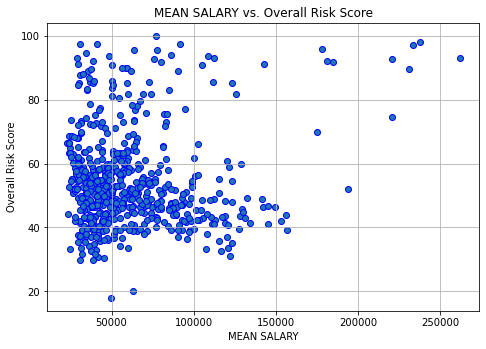

In [6]:
## Plot of Mean Salary to Overall Risk Score
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(OverallRiskScore['MEAN_SALARY'], OverallRiskScore['Overall Risk Score'],edgecolors='b')
ax.set_xlabel('MEAN SALARY')
ax.set_ylabel('Overall Risk Score')
plt.grid(True)
plt.title('MEAN SALARY vs. Overall Risk Score')
# Save the plot as png file with all axis values and axis labels
plt.savefig(Plot_Path + '/MeanSalary_OverallRiskScore.png', dpi=200, bbox_inches='tight')

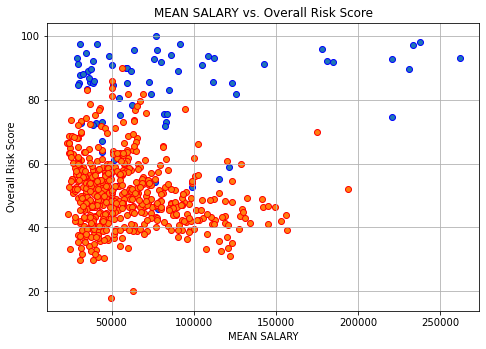

In [7]:
## Plot of Mean Salary to Overall Risk Score
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
OverallRiskScore_SalH = OverallRiskScore[OverallRiskScore['Health/Non Health']=='Health']
OverallRiskScore_SalNH = OverallRiskScore[OverallRiskScore['Health/Non Health']=='Non Health']

OverallRiskScore_SalH = OverallRiskScore[OverallRiskScore['Health/Non Health']=='Health']
OverallRiskScore_SalNH = OverallRiskScore[OverallRiskScore['Health/Non Health']=='Non Health']

ax.scatter(OverallRiskScore_SalH['MEAN_SALARY'], OverallRiskScore_SalH['Overall Risk Score'],edgecolors='b')
ax.scatter(OverallRiskScore_SalNH['MEAN_SALARY'], OverallRiskScore_SalNH['Overall Risk Score'],edgecolors='r')
ax.set_xlabel('MEAN SALARY')
ax.set_ylabel('Overall Risk Score')

plt.grid(True)
plt.title('MEAN SALARY vs. Overall Risk Score')
# Save the plot as png file with all axis values and axis labels
plt.savefig(Plot_Path + '/MeanSalary_OverallRiskScore_WithHealthVsNonHealth.png', dpi=200, bbox_inches='tight')

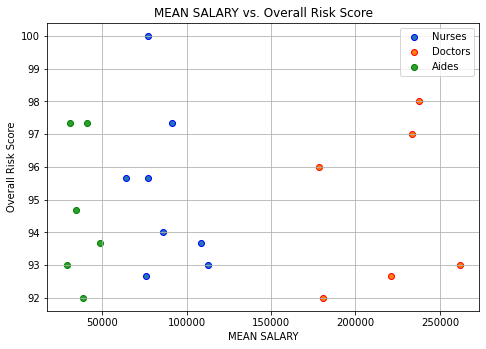

In [8]:
## Plot of Mean Salary to Overall Risk Score
ORS_Cat = pd.read_csv('OutputFiles/OverallRiskScore_withCategory.csv')
ORS_Cat = ORS_Cat[~ORS_Cat['Category'].isnull()]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ORS_Cat_Nurses = ORS_Cat[ORS_Cat['Category']=='Nurses']
ORS_Cat_Doctors = ORS_Cat[ORS_Cat['Category']=='Doctors']
ORS_Cat_Aides = ORS_Cat[ORS_Cat['Category']=='Aides']

ax.scatter(ORS_Cat_Nurses['MEAN_SALARY'], ORS_Cat_Nurses['Overall Risk Score'],edgecolors='b')
ax.scatter(ORS_Cat_Doctors['MEAN_SALARY'], ORS_Cat_Doctors['Overall Risk Score'],edgecolors='r')
ax.scatter(ORS_Cat_Aides['MEAN_SALARY'], ORS_Cat_Aides['Overall Risk Score'],edgecolors='g')
ax.set_xlabel('MEAN SALARY')
ax.set_ylabel('Overall Risk Score')

plt.grid(True)
plt.title('MEAN SALARY vs. Overall Risk Score')
plt.legend(['Nurses', 'Doctors', 'Aides'])
# Save the plot as png file with all axis values and axis labels
plt.savefig(Plot_Path + '/MeanSalary_Top20OverallRiskScore.png', dpi=200, bbox_inches='tight')

In [9]:
ORS_Cat.columns

Index(['OCCUPATION', 'Category', 'Overall Risk Score', 'TOT_EMP',
       'Health/Non Health', 'MEAN_SALARY', 'PCT_TOT_EMP'],
      dtype='object')

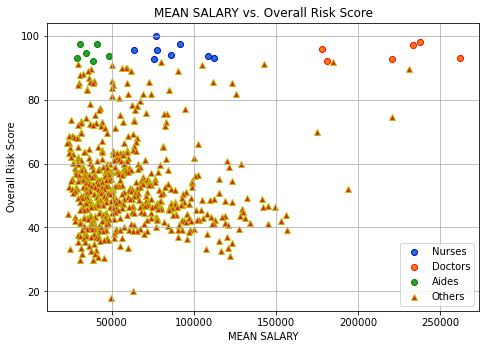

In [10]:
## Plot of Mean Salary to Overall Risk Score
ORS_Cat = pd.read_csv('OutputFiles/OverallRiskScore_withCategory.csv')
ORS_Cat.loc[(ORS_Cat['Category'].isnull()), 'Category'] = 'Others'
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ORS_Cat_Nurses = ORS_Cat[ORS_Cat['Category']=='Nurses']
ORS_Cat_Doctors = ORS_Cat[ORS_Cat['Category']=='Doctors']
ORS_Cat_Aides = ORS_Cat[ORS_Cat['Category']=='Aides']
ORS_Cat_Others = ORS_Cat[ORS_Cat['Category']=='Others']

ax.scatter(ORS_Cat_Nurses['MEAN_SALARY'], ORS_Cat_Nurses['Overall Risk Score'],edgecolors='b')
ax.scatter(ORS_Cat_Doctors['MEAN_SALARY'], ORS_Cat_Doctors['Overall Risk Score'],edgecolors='r')
ax.scatter(ORS_Cat_Aides['MEAN_SALARY'], ORS_Cat_Aides['Overall Risk Score'],edgecolors='g')
ax.scatter(ORS_Cat_Others['MEAN_SALARY'], ORS_Cat_Others['Overall Risk Score'],edgecolors='y',marker='^')
ax.set_xlabel('MEAN SALARY')
ax.set_ylabel('Overall Risk Score')

plt.grid(True)
plt.title('MEAN SALARY vs. Overall Risk Score')
plt.legend(['Nurses', 'Doctors', 'Aides', 'Others'])
# Save the plot as png file with all axis values and axis labels
plt.savefig(Plot_Path + '/MeanSalary_Top20OverallRiskScore_WithCategory.png', dpi=200, bbox_inches='tight')

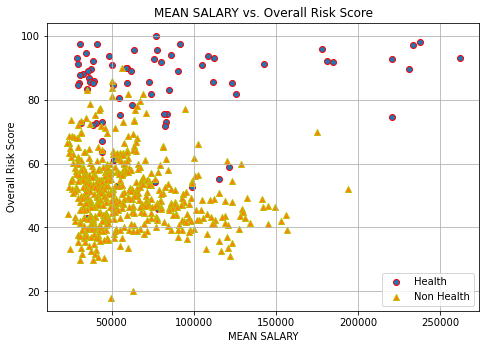

In [11]:
## Plot of Mean Salary to Overall Risk Score
ORS_Cat = pd.read_csv('OutputFiles/OverallRiskScore_withCategory.csv')
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ORS_Health = ORS_Cat[ORS_Cat['Health/Non Health']=='Health']
ORS_NonHealth = ORS_Cat[ORS_Cat['Health/Non Health']=='Non Health']

ax.scatter(ORS_Health['MEAN_SALARY'], ORS_Health['Overall Risk Score'],edgecolors='r')
ax.scatter(ORS_NonHealth['MEAN_SALARY'], ORS_NonHealth['Overall Risk Score'],edgecolors='y',marker='^')
ax.set_xlabel('MEAN SALARY')
ax.set_ylabel('Overall Risk Score')

plt.grid(True)
plt.title('MEAN SALARY vs. Overall Risk Score')
plt.legend(['Health', 'Non Health'])
# Save the plot as png file with all axis values and axis labels
plt.savefig(Plot_Path + '/MeanSalary_Health_NonHealth.png', dpi=200, bbox_inches='tight')

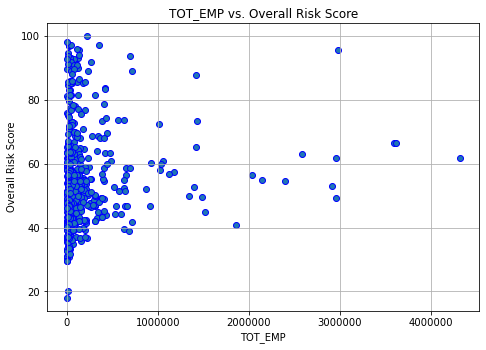

In [12]:
## Plot of Total Employees to Overall Risk Score
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(OverallRiskScore['TOT_EMP'], OverallRiskScore['Overall Risk Score'],edgecolors='b')
ax.set_xlabel('TOT_EMP')

# To stop matplotlib from showing exponential notation for Tot_Emp
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('Overall Risk Score')
plt.grid(True)
plt.title('TOT_EMP vs. Overall Risk Score')
# Save the plot as png file with all axis values and axis labels
plt.savefig(Plot_Path + '/TotEmp_OverallRiskScore.png', dpi=200, bbox_inches='tight')

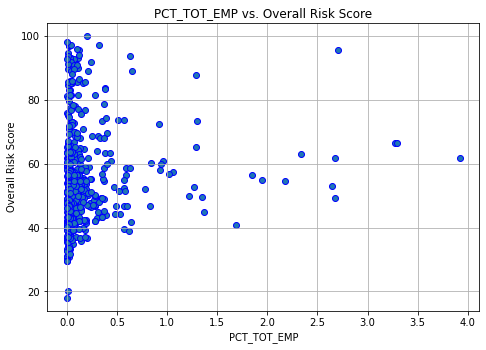

In [13]:
## Plot of Total Employees to Overall Risk Score
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(OverallRiskScore['PCT_TOT_EMP'], OverallRiskScore['Overall Risk Score'],edgecolors='b')
ax.set_xlabel('PCT_TOT_EMP')
ax.set_ylabel('Overall Risk Score')
plt.grid(True)
plt.title('PCT_TOT_EMP vs. Overall Risk Score')
# Save the plot as png file with all axis values and axis labels
plt.savefig(Plot_Path + '/PctTotEmp_OverallRiskScore.png', dpi=200, bbox_inches='tight')

In [ ]:
## Plot of Total Employees to Overall Risk Score
# Create two datasets, one for 
OverallRiskScore_H = OverallRiskScore[OverallRiskScore['Health/Non Health']=='Health'].head(20)
OverallRiskScore_NH = OverallRiskScore[OverallRiskScore['Health/Non Health']=='Non Health'].head(20)                                        
fig=plt.figure(figsize=(6,6), dpi = 800)
ax=fig.add_axes([0,0,10,2])
ax.scatter(OverallRiskScore_H['OCCUPATION'], OverallRiskScore_H['Overall Risk Score'],edgecolors='b')
ax.scatter(OverallRiskScore_NH['OCCUPATION'], OverallRiskScore_NH['Overall Risk Score'],edgecolors='r')
ax.set_xlabel('OCCUPATION')
ax.set_ylabel('Overall Risk Score')
plt.grid(True)
plt.title('OCCUPATION vs. Overall Risk Score')
plt.show()
plt.savefig(Plot_Path + '/Occupation_OverallRiskScore.png', dpi=800, bbox_inches='tight')